In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
from torch.utils.data.dataset import Dataset

class RNNData(Dataset):
    def __init__(self):
        pass
    
    def __len__(self):
        return 100
    
    def __getitem__(self, index):
        L = torch.randint(-10, 10, (1,)).item()
        self.x = torch.sin(torch.linspace(L, L+3., 51))
        self.x = self.x.view(len(self.x), -1)
        return self.x[:50], self.x[-1]

In [3]:
dataset = RNNData()

In [4]:
dataset[25]

(tensor([[ 0.6570],
         [ 0.7010],
         [ 0.7425],
         [ 0.7813],
         [ 0.8174],
         [ 0.8504],
         [ 0.8805],
         [ 0.9073],
         [ 0.9309],
         [ 0.9511],
         [ 0.9679],
         [ 0.9812],
         [ 0.9910],
         [ 0.9973],
         [ 0.9999],
         [ 0.9989],
         [ 0.9944],
         [ 0.9863],
         [ 0.9746],
         [ 0.9594],
         [ 0.9407],
         [ 0.9187],
         [ 0.8934],
         [ 0.8648],
         [ 0.8331],
         [ 0.7985],
         [ 0.7610],
         [ 0.7207],
         [ 0.6778],
         [ 0.6325],
         [ 0.5849],
         [ 0.5352],
         [ 0.4836],
         [ 0.4303],
         [ 0.3754],
         [ 0.3191],
         [ 0.2617],
         [ 0.2033],
         [ 0.1443],
         [ 0.0847],
         [ 0.0248],
         [-0.0352],
         [-0.0951],
         [-0.1546],
         [-0.2136],
         [-0.2718],
         [-0.3290],
         [-0.3850],
         [-0.4397],
         [-0.4927]])

In [5]:
from torch.utils.data import DataLoader

batch_size = 1

dataloader = DataLoader(dataset, batch_size = batch_size)

In [6]:
class RNNModel(torch.nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.hidden_size = 4
        self.rnn = torch.nn.RNN(input_size = 1, hidden_size = self.hidden_size, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(self.hidden_size, 1)
    
    def forward(self, x):
        out, hid = self.rnn(x)
        out = self.linear(out[:,-1,:])
        return out

In [7]:
model = RNNModel()

In [8]:
criterion = torch.nn.MSELoss() 

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [10]:
class AverageMeter:
    def __init__(self):
        self.val = 0.
        self.avg = 0.
        self.sum = 0.
        self.count = 0.
    
    def update(self, val, n = 1):
        self.val = val
        self.sum = self.sum + val*n
        self.count = self.count + n
        self.avg = self.sum / self.count
    
    def get_avg(self):
        return self.avg

In [11]:
LOSSES = []

for epoch in range(100):
    
    averagemeter = AverageMeter()
    
    for x, y in dataloader:
        h_0 = torch.zeros(1,10,1)
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        averagemeter.update(val=loss.item())
    
    LOSSES.append(averagemeter.get_avg())
    print(f"Epoch: {epoch} Loss: {loss.item()}")

Epoch: 0 Loss: 0.0007160169188864529
Epoch: 1 Loss: 0.002938847756013274
Epoch: 2 Loss: 0.0013417050940915942
Epoch: 3 Loss: 3.0905102903489023e-05
Epoch: 4 Loss: 0.0027224530931562185
Epoch: 5 Loss: 0.00026805687230080366
Epoch: 6 Loss: 0.0001330518425675109
Epoch: 7 Loss: 0.0004132197063881904
Epoch: 8 Loss: 1.8235878087580204e-06
Epoch: 9 Loss: 0.0006693322211503983
Epoch: 10 Loss: 6.516920166177442e-06
Epoch: 11 Loss: 0.00014094139623921365
Epoch: 12 Loss: 0.000795678817667067
Epoch: 13 Loss: 6.447990017477423e-07
Epoch: 14 Loss: 9.030729586356756e-08
Epoch: 15 Loss: 1.4011334315000568e-09
Epoch: 16 Loss: 1.8926188204204664e-05
Epoch: 17 Loss: 7.71072882344015e-05
Epoch: 18 Loss: 0.00023144844453781843
Epoch: 19 Loss: 0.001121827750466764
Epoch: 20 Loss: 0.0013235092628747225
Epoch: 21 Loss: 1.0218614079349209e-05
Epoch: 22 Loss: 2.354756588829332e-06
Epoch: 23 Loss: 3.4523577596701216e-07
Epoch: 24 Loss: 0.0012230166466906667
Epoch: 25 Loss: 0.00013398300507105887
Epoch: 26 Loss: 

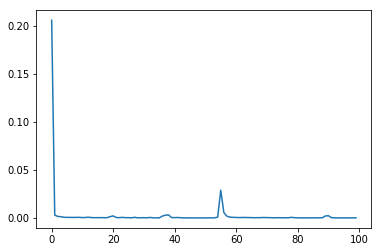

In [12]:
plt.plot(LOSSES[:])

In [13]:
AC = []
PR = []
with torch.no_grad():
    for x, y in dataloader:
        y_hat = model(x)
        print(y_hat, y)
        AC.append(y.item())
        PR.append(y_hat.item())

tensor([[0.2729]]) tensor([[0.2794]])
tensor([[-0.9686]]) tensor([[-0.9589]])
tensor([[0.6433]]) tensor([[0.6570]])
tensor([[-0.5468]]) tensor([[-0.5366]])
tensor([[0.9042]]) tensor([[0.9093]])
tensor([[0.9459]]) tensor([[0.9589]])
tensor([[-0.7575]]) tensor([[-0.7568]])
tensor([[-1.0059]]) tensor([[-1.0000]])
tensor([[-0.2860]]) tensor([[-0.2794]])
tensor([[-0.1512]]) tensor([[-0.1411]])
tensor([[0.6433]]) tensor([[0.6570]])
tensor([[0.9459]]) tensor([[0.9589]])
tensor([[-0.0042]]) tensor([[0.]])
tensor([[0.4049]]) tensor([[0.4121]])
tensor([[0.4049]]) tensor([[0.4121]])
tensor([[0.9459]]) tensor([[0.9589]])
tensor([[-0.0042]]) tensor([[0.]])
tensor([[-0.8545]]) tensor([[-0.8415]])
tensor([[0.2729]]) tensor([[0.2794]])
tensor([[0.2729]]) tensor([[0.2794]])
tensor([[-0.9686]]) tensor([[-0.9589]])
tensor([[-0.1512]]) tensor([[-0.1411]])
tensor([[0.1311]]) tensor([[0.1411]])
tensor([[-0.6692]]) tensor([[-0.6570]])
tensor([[-0.6692]]) tensor([[-0.6570]])
tensor([[0.2729]]) tensor([[0.2794

In [14]:
x, y = next(iter(dataloader))

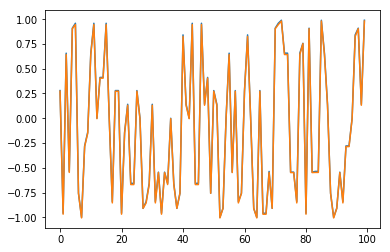

In [15]:
plt.plot(AC)
plt.plot(PR)